# How to Identify Overfitting Machine Learning Models in Scikit-Learn

### What Is Overfitting?
Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. When data scientists use machine learning models for making predictions, they first train the model on a known data set. Then, based on this information, the model tries to predict outcomes for new data sets. An overfit model can give inaccurate predictions and cannot perform well for all types of new data.

But what does it mean if a model’s performance is “significantly better” on the training set compared to the test set?

For example, it is common and perhaps normal for the model to have better performance on the training set than the test set. As such, we can perform an analysis of the algorithm on the dataset to better expose the overfitting behavior.


## Performing an Overfitting Analysis

An overfitting analysis is an approach for exploring how and when a specific model is overfitting on a specific dataset.

This might be achieved by reviewing the model behavior during a single run for algorithms like neural networks that are fit on the training dataset incrementally.

A plot of the model performance on the train and test set can be calculated at each point during training and plots can be created. This plot is often called a learning curve plot, showing one curve for model performance on the training set and one curve for the test set for each increment of learning.

### How do you perform an overfitting analysis for machine learning algorithms in scikit-learn?

One approach for performing an overfitting analysis on algorithms that do not learn incrementally is by varying a key model hyperparameter and evaluating the model performance on the train and test sets for each configuration.

## Example of Overfitting in Scikit-Learn

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier


In [2]:
X, y = make_classification(n_samples=10000, 
                           n_features=20, 
                           n_informative=5, 
                           n_redundant=15, 
                           random_state=1)
print(X.shape, y.shape)


(10000, 20) (10000,)


In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


We will use a decision tree via the DecisionTreeClassifier and test different tree depths with the “max_depth” argument.

Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset.

We will enumerate each tree depth, fit a tree with a given depth on the training dataset, then evaluate the tree on both the train and test sets.

The expectation is that as the depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the holdout test set.

We evaluate decision tree depths from 1 to 20.

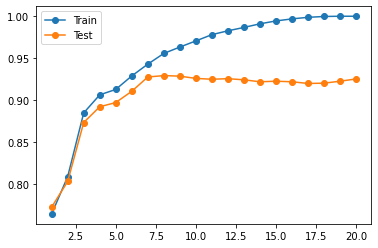

In [10]:
values = [i for i in range(1, 21)]
train_scores = []
test_scores = []

for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x, train_y)
    train_yhat = model.predict(train_x)
    train_acc = accuracy_score(train_y, train_yhat)
    train_scores.append(train_acc)

    test_yhat = model.predict(test_x)
    test_acc = accuracy_score(test_y, test_yhat)
    test_scores.append(test_acc)


# plot accuracy scores
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

We can see that the accuracy on the test set improves with tree depth until a depth of about eight or nine levels, after which accuracy begins to get worse with each increase in tree depth.

This is exactly what we would expect to see in a pattern of overfitting. We would choose a tree depth of eight or nine before the model begins to overfit the training dataset.

### Note:
This analysis is interesting. It shows why the model has a worse hold-out test set performance when “max_depth” is set to large values.

**But it is not required.**

We can just as easily choose a “max_depth” using a grid search without performing an analysis on why some values result in better performance and some result in worse performance.In fact, in the next section, we will show where this analysis can be misleading.


## Counterexample of Overfitting in Scikit-Learn

Sometimes, we may perform an analysis of machine learning model behavior and be deceived by the results. A good example of this is varying the number of neighbors for the k-nearest neighbors algorithms, which we can implement using the KNeighborsClassifier class and configure via the “n_neighbors” argument.

Let’s forget how KNN works for the moment.

We can perform the same analysis of the KNN algorithm as we did in the previous section for the decision tree and see if our model overfits for different configuration values. In this case, we will vary the number of neighbors from 1 to 50 to get more of the effect.

In [13]:
values = [i for i in range(1, 51)]
train_scores = []
test_scores = []

for i in values:
	model = KNeighborsClassifier(n_neighbors=i)
	model.fit(train_x, train_y)
	train_yhat = model.predict(train_x)
	train_acc = accuracy_score(train_y, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = model.predict(test_x)
	test_acc = accuracy_score(test_y, test_yhat)
	test_scores.append(test_acc)
	
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Recall, we are looking for a pattern where performance on the test set improves and then starts to get worse, and performance on the training set continues to improve.

We do not see this pattern.

Instead, we see that accuracy on the training dataset starts at perfect accuracy and falls with almost every increase in the number of neighbors.

We also see that performance of the model on the holdout test improves to a value of about five neighbors, holds level and begins a downward trend after that.